In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


2025-11-12 13:15:55.404578: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<BarContainer object of 3 artists>

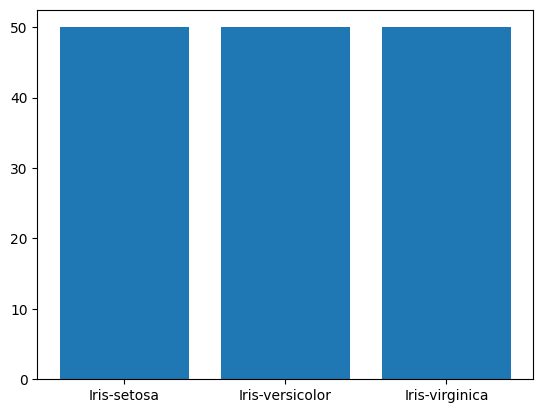

In [5]:
specie = df['Species'].value_counts()
plt.bar(specie.index,specie.values)

In [6]:
df = df.drop(columns='Id')

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

In [12]:
ann.add(Dense(4,activation='relu'))
ann.add(Dense(5,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(3,activation='softmax'))

In [13]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

I0000 00:00:1762933557.844601   53579 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1217 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
x_train.shape,y_train.shape

((105, 4), (105,))

In [15]:
ann.fit(x_train,y_train,epochs=120,batch_size=12)

Epoch 1/120


2025-11-12 13:15:58.688724: I external/local_xla/xla/service/service.cc:163] XLA service 0x772820017b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-12 13:15:58.688741: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-11-12 13:15:58.709492: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-12 13:15:58.834384: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91500


1/9 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1667 - loss: 1.0949

I0000 00:00:1762933559.510543   53659 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.2857 - loss: 1.0826
Epoch 2/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.0750 
Epoch 3/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3429 - loss: 1.0680 
Epoch 4/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3905 - loss: 1.0609 
Epoch 5/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4000 - loss: 1.0549 
Epoch 6/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4000 - loss: 1.0481 
Epoch 7/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4190 - loss: 1.0413 
Epoch 8/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4286 - loss: 1.0344 
Epoch 9/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4286 - loss: 1.0280 
Epoch 10/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4476 - loss: 1.0210 
Epoch 11/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4857 - loss: 1.0137 
Epoch 12/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5048 - loss: 1.0062 
E

In [16]:
ann.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 1.0000 - loss: 0.1386


[0.13857367634773254, 1.0]

In [17]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254 (1020.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 170 (684.00 B)

In [18]:
y_pred = ann.predict(scalar.transform([[5.4,3.3,2.3,0.4]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [19]:
y_pred

array([[0.9818131 , 0.01373201, 0.00445497]], dtype=float32)

In [20]:
encoder.inverse_transform([np.argmax(y_pred)])[0]

'Iris-setosa'

In [25]:
y_pred_1 = ann.predict(x_test)
y_pred_2 = y_pred_1.argmax(axis=1)
encoder.inverse_transform(y_pred_2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [26]:
encoder.inverse_transform(y_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)